In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_t1 = pd.read_csv("retail_sales_dataset.csv")

In [44]:
df_t1.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [45]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [46]:
df_t1.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [47]:
df_t1.duplicated().sum()

0

In [48]:
df_t1.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [49]:
df_t1.columns = df_t1.columns.str.lower().str.replace(' ',' ')

In [50]:
df_t1['date'] = pd.to_datetime(df_t1['date'])
df_t1['gender'] = df_t1['gender'].astype('category')
df_t1['product category'] = df_t1['product category'].astype('category')

df_t1.head(3)

,transaction id,date,customer id,gender,age,product category,quantity,price per unit,total amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30


In [51]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer id       1000 non-null   object        
 3   gender            1000 non-null   category      
 4   age               1000 non-null   int64         
 5   product category  1000 non-null   category      
 6   quantity          1000 non-null   int64         
 7   price per unit    1000 non-null   int64         
 8   total amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


In [52]:
df_t1['product category'].value_counts()

product category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [53]:
df_t1['gender'].value_counts()

gender
Female    510
Male      490
Name: count, dtype: int64

In [54]:
df_t1['age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

In [55]:
df_t1['quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

In [56]:
df_t1['price per unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price per unit, dtype: float64

# **Time Series Anaslysis**



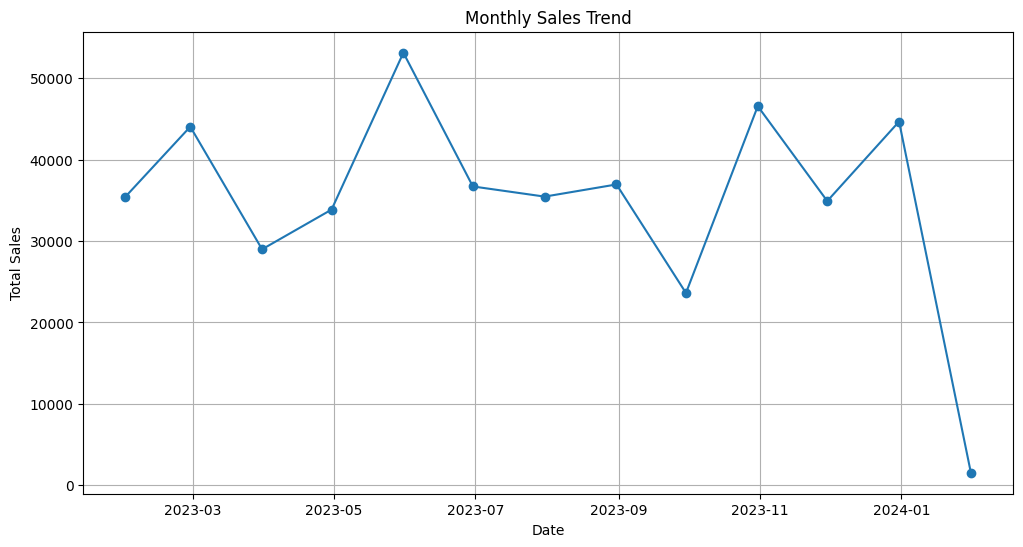

In [57]:
df_t1['date'] = pd.to_datetime(df_t1['date'])

df_t1.set_index('date', inplace=True)

monthly_sales = df_t1['total amount'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# **Customer and Product Analysis**



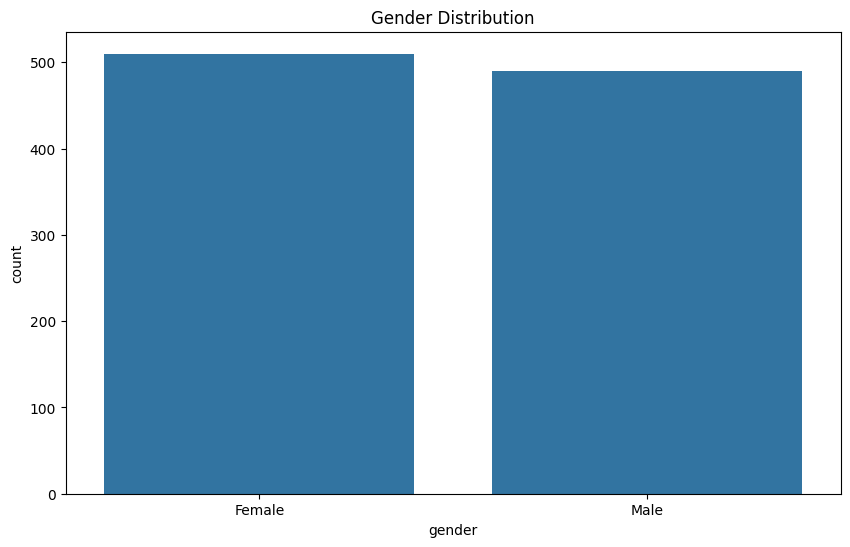

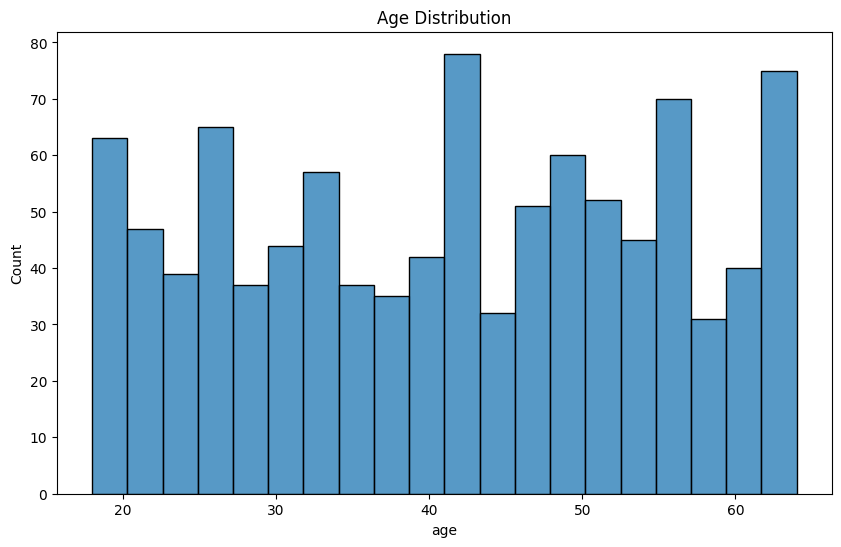

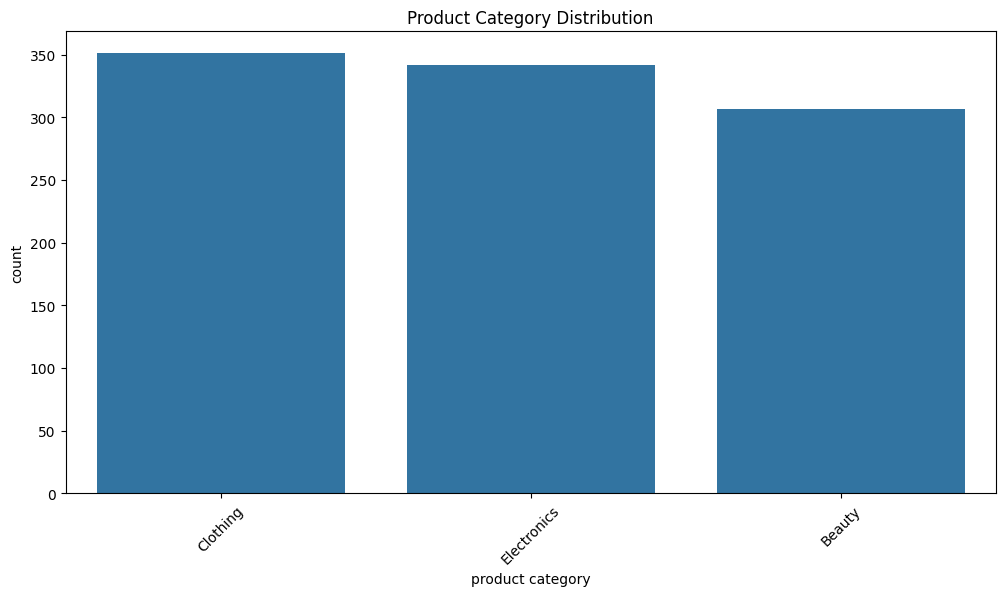

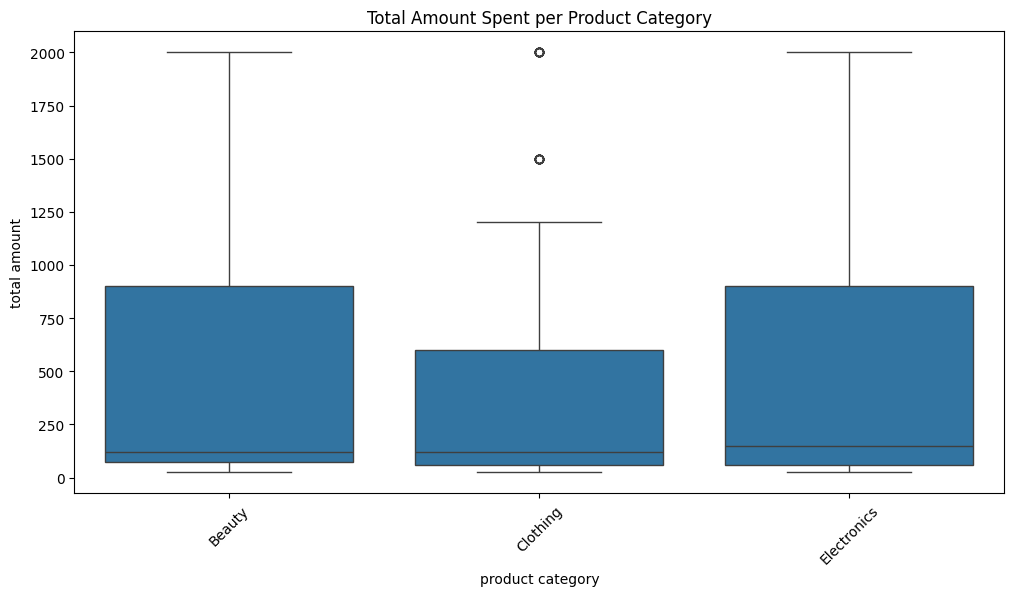

In [58]:
import seaborn as sns

# Customer demographics analysis
plt.figure(figsize=(10, 6))
sns.countplot(df_t1, x='gender')
plt.title('Gender Distribution')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df_t1, x='age', bins=20)
plt.title('Age Distribution')
plt.show()

# Product category analysis
plt.figure(figsize=(12, 6))
sns.countplot(df_t1, x='product category', order=df_t1['product category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

# Purchasing behavior analysis
plt.figure(figsize=(12, 6))
sns.boxplot(df_t1, x='product category', y='total amount')
plt.title('Total Amount Spent per Product Category')
plt.xticks(rotation=45)
plt.show()


# **Visualization - 1** (Correlation Matrix)

In [59]:
import plotly.graph_objects as go

numeric_df_t1 = df_t1.select_dtypes(include=[np.number])
corr_matrix = numeric_df_t1.corr()
fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='Viridis'))
fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

# **Visualization - 2** (Stacked Bar Chart)

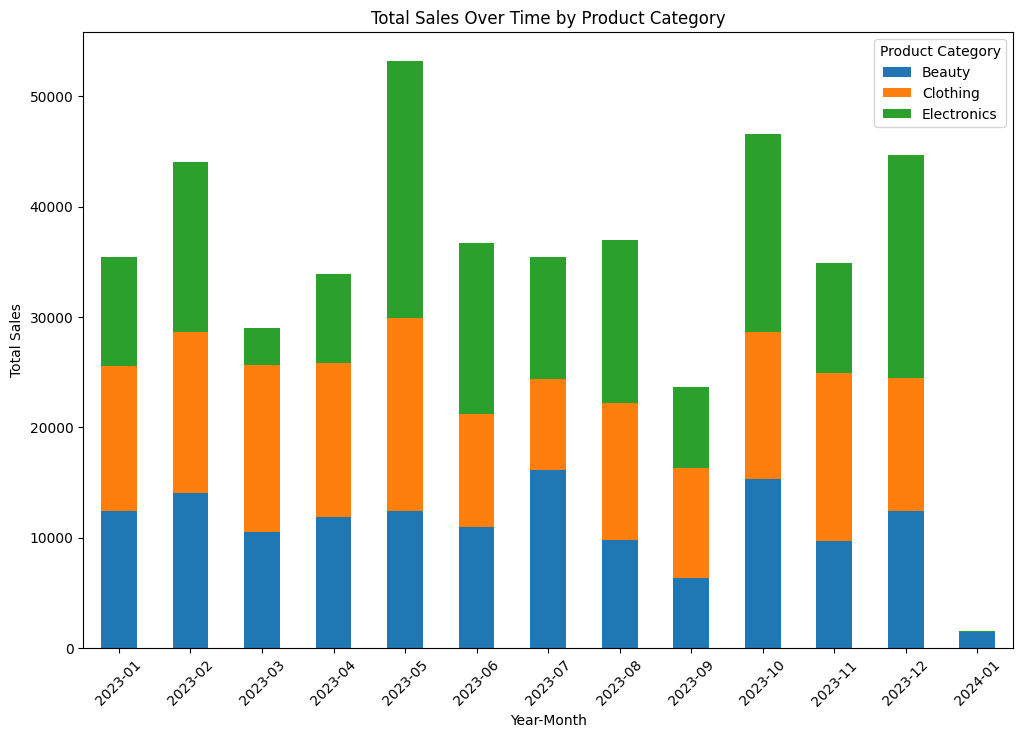

In [60]:
df_t1.index = pd.to_datetime(df_t1.index)

df_t1['year_month'] = df_t1.index.to_period('M')
sales_over_time = df_t1.groupby(['year_month', 'product category'])['total amount'].sum().unstack()

sales_over_time.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Sales Over Time by Product Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# **Visualization - 3** (Box Plot)

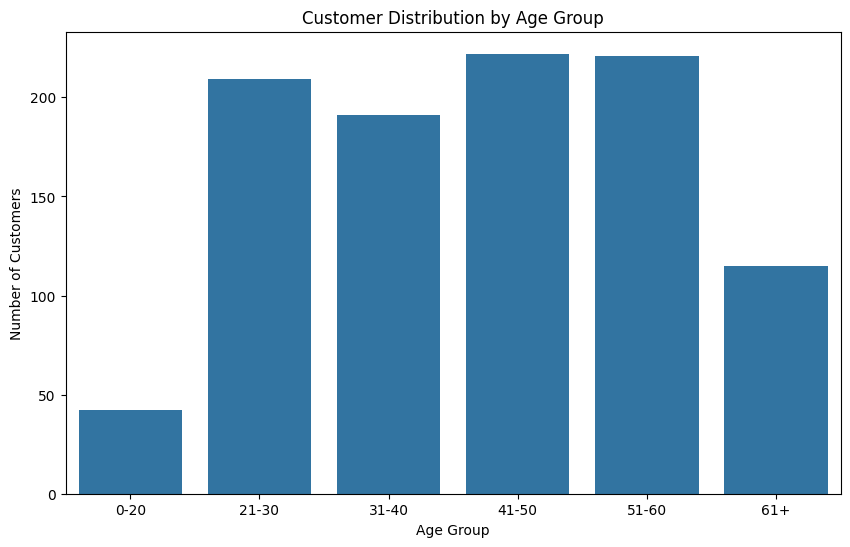

In [61]:
import seaborn as sns

# Group ages into bins
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df_t1['age_group'] = pd.cut(df_t1['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_t1, x='age_group', order=labels)
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


# **Visualization - 4** (Pie Chart)

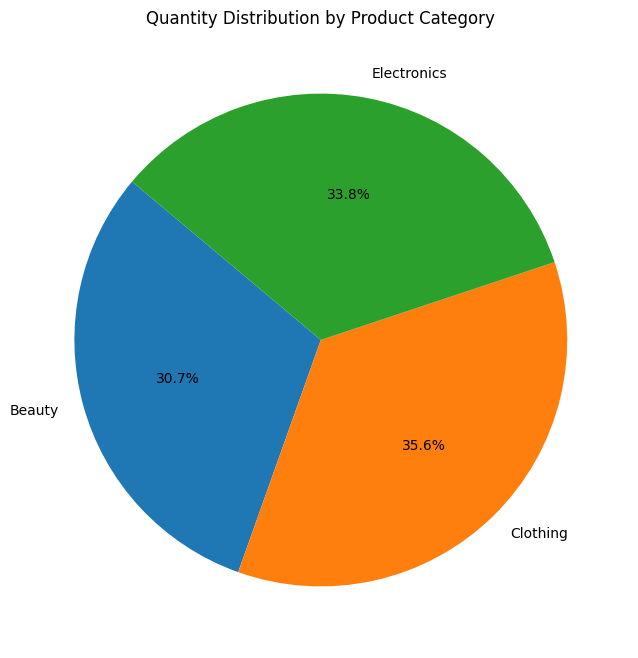

In [62]:
plt.figure(figsize=(8, 8))
quantity_by_category = df_t1.groupby('product category')['quantity'].sum()
plt.pie(quantity_by_category, labels=quantity_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Quantity Distribution by Product Category')
plt.show()


1. Understanding Sales Trends and Seasonal Peaks
Insight: Sales peak in certain months.
Recommendation: Run special promotions during high-demand months to boost sales.

2. Targeting Customers Effectively Using Demographics
Insight: Customers are evenly split between men and women, with different age preferences.
Recommendation: Offer gender-specific discounts and bundles to meet preferences and increase engagement.

3. Optimizing Product Category Performance
Insight: Some products sell better than others.
Recommendation: Keep popular products in stock and suggest related items to boost sales.

4. Understanding Purchasing Behavior for Strategic Pricing
Insight: Spending varies across product categories.
Recommendation: Use flexible pricing or bundle deals for high-spending categories to encourage larger purchases.

5. Using Correlation Insights for Strategic Decisions
Insight: Certain factors strongly affect sales and customer behavior.
Recommendation: Analyze these factors further to improve marketing and operations.

6. Monitoring and Responding to Sales Trends Over Time
Insight: Sales patterns change over time.
Recommendation: Track sales trends and adjust inventory to match seasonal demand.

7. Improving Customer Engagement and Retention
Insight: Some product categories attract more repeat purchases.
Recommendation: Use loyalty programs and personalized recommendations to retain customers.